### Data Exploration - Bureau Data

### Bureau Data

Step 4: Because our performance numbers using just the application_train data were pretty dismal, we'll look at credit bureau data to form a more complete picture of our loan applicants.  Hopefully adding some additional data to our profile will help improve our performance.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Training Set
application_train = pd.read_csv('data/tmp/application_train_reduced.csv', index_col=0)

print("Loaded Training Set: {0} rows {1} columns".format(application_train.shape[0], application_train.shape[1]))

bureau_data = pd.read_csv('data/bureau.csv')
print("Loaded Bureau Set: {0} rows".format(bureau_data.shape[0]))

bureau_balance_data = pd.read_csv('data/bureau_balance.csv')
print("Loaded Bureau Balance Set: {0} rows".format(bureau_balance_data.shape[0]))

Loaded Training Set: 307511 rows 41 columns
Loaded Bureau Set: 1716428 rows
Loaded Bureau Balance Set: 27299925 rows


In [3]:
non_numeric_features = []    # non-numeric features for one-hot encoding
numeric_features = []        # numeric features (for feature scaling)
string_to_bool_features = [] # boolean features (that need conversion from string to binary)
log_transform_features = []  # skewed features that need log transformation

### Inspect Data

#### Application Data

In [4]:
display(application_train.head(n=10))

,EXT_SOURCE_3,EXT_SOURCE_2,LOG_AMT_CREDIT,LOG_AMT_GOODS_PRICE,LOG_AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,DAYS_ID_PUBLISH,DAYS_REGISTRATION,LOG_OWN_CAR_AGE,REGION_RATING_CLIENT_W_CITY,CODE_GENDER_M,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade: type 2,REGION_POPULATION_RELATIVE,ORGANIZATION_TYPE_Transport: type 3,FLAG_DOCUMENT_16,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_13,LOG_DAYS_LAST_PHONE_CHANGE,ORGANIZATION_TYPE_Realtor,FLAG_DOCUMENT_18,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,ORGANIZATION_TYPE_Construction,HOUR_APPR_PROCESS_START_17,OCCUPATION_TYPE_Core staff,NAME_INCOME_TYPE_Working,NAME_CONTRACT_TYPE_Cash loans,LOG_DEF_60_CNT_SOCIAL_CIRCLE,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_FAMILY_STATUS_Married,NAME_HOUSING_TYPE_Municipal apartment,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Industry: type 9,TOTALAREA_MODE,BOOL_FLAG_OWN_CAR,AMT_REQ_CREDIT_BUREAU_QRT,SK_ID_CURR
0,-0.699964,-1.109592,-0.212852,-0.237311,-0.011050,0.233104,0.865181,0.181994,0.439705,0.156504,0.000000,2,1,0,0,-0.002626,0,0,0,0,-0.289694,0,0,1,0,0,0,0,1,1,1.098612,0,0,0,0,0,0,0.140825,0,0.0,100002
1,-1.004534,0.208255,0.842157,0.878982,0.487362,0.010117,-0.139634,0.682213,1.148895,0.606637,0.000000,1,0,0,0,-0.820550,0,0,0,0,-0.052169,0,0,1,0,0,0,1,0,1,0.000000,1,0,1,0,0,0,0.944523,0,0.0,100003
2,0.589744,-0.035047,-1.217959,-1.149938,-1.766614,0.399838,-0.453432,0.000000,0.280341,0.044611,1.839442,2,1,0,0,-0.472638,0,0,0,0,-0.042539,0,0,0,0,0,0,0,1,0,0.000000,0,0,0,0,0,0,-0.071124,1,0.0,100004
3,-1.004534,0.311674,-0.452276,-0.396867,0.237785,-0.738972,-0.447792,0.000000,0.316789,-0.974312,0.000000,2,0,0,0,-0.580533,0,0,0,0,0.099924,0,0,1,0,0,1,0,1,1,0.000000,0,0,0,0,0,0,-0.071124,0,0.0,100006
4,-1.004534,-0.890293,-0.000943,0.125148,-0.176037,-0.738567,-0.575320,0.000000,-0.079100,0.035287,0.000000,2,1,0,0,0.525969,0,0,0,0,-0.267043,0,0,0,0,0,0,1,1,1,0.000000,0,0,0,0,0,0,-0.071124,0,0.0,100007
5,0.352995,-0.774805,-0.041838,0.009504,0.135108,-0.151760,-0.163846,0.000000,1.076774,-0.085200,0.000000,2,1,0,0,0.908077,0,0,0,0,-1.783715,0,0,1,0,0,0,0,0,1,0.000000,0,0,1,0,0,0,-0.071124,0,1.0,100008
6,0.070735,0.581474,1.013358,1.080627,0.684650,-0.775799,0.271289,1.698066,1.021714,0.601700,1.613147,2,0,0,0,0.908077,0,0,0,0,-0.662731,0,0,0,0,0,0,0,0,1,0.000000,1,0,1,0,0,0,-0.071124,1,1.0,100009
7,0.176926,0.545820,0.995232,1.168855,0.709777,0.309187,-0.426469,0.000000,0.339279,-0.017003,1.226294,3,1,0,0,-0.843008,0,0,0,0,-0.238205,0,0,1,0,0,0,0,0,1,0.000000,1,0,1,0,0,0,-0.071124,1,0.0,100010
8,0.638163,-1.319398,0.625251,0.676260,0.414466,26.316490,-0.598294,1.287277,-0.100814,-0.534418,0.000000,2,0,0,0,-0.011577,0,0,0,0,0.499918,0,0,1,0,0,0,0,0,1,0.000000,0,0,1,0,0,0,-0.071124,0,0.0,100011
9,-1.004534,0.664528,-0.216441,-0.100632,-0.279911,-0.326184,0.176228,0.000000,-0.286157,-1.816071,0.000000,2,1,0,0,0.044970,0,0,0,0,-0.768809,0,0,0,0,0,0,0,1,0,0.000000,0,0,0,0,0,0,-0.071124,0,0.0,100012


#### Bureau Data

In [5]:
display(bureau_data.head(n=10))

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


#### Bureau Balance Data

In [6]:
display(bureau_balance_data.head(n=10))

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


### Utility Functions

In [7]:
# Visualize the contents of a non-numeric column

def explore_non_numeric(field, showDetails=True):

    # Inspired By: 
    # https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array

    unique, counts = np.unique(field, return_counts=True)
    total_records = np.size(field)

    if (showDetails): 
        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Example code from: https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=unique, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [8]:
# Visualize the contents of a numeric column

def explore_numeric(field, showUnique=False, graphType="dist", bins=20, showMeanLines=True):     
    mean = np.mean(field)
    avg = np.average(field)
    
    # Take a look at the range
    print("Max: {0} Min: {1} Mean: {2} Avg: {3} Std: {4}".format(
    np.max(field),
    np.min(field),
    mean,
    avg,
    np.std(field)))

    # Unique Values
    # print("Values: {0}".format(application_train['CNT_CHILDREN'].unique()))

    if (showUnique): 
    
        unique, counts = np.unique(application_train['CNT_CHILDREN'], return_counts=True)
        total_records = np.size(application_train['CNT_CHILDREN'])

        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Examine distribution
    plt.figure(figsize=(15,10))
    plt.title("Distribution Graph")
    if (showMeanLines):
        plt.axvline(avg, color="red")    # Plot the average
        plt.axvline(mean, color="green") # Plot the mean
    
    if (graphType == "hist"): 
        sns.distplot(field,bins=bins)
    else: 
        sns.distplot(field)

### Original Fields
The unedited fields from burea_data and bureau_balance_data.  We'll need to use these to create features that we can combine with the application_train dataset.

#### CREDIT_TYPE
Type of Credit Bureau credit (Car, cash,...)

Value: 0 Count: 1017 Percentage: 0.05925095605524962
Value: 1 Count: 27690 Percentage: 1.6132339952506018
Value: 2 Count: 56 Percentage: 0.003262589517299881
Value: 3 Count: 1251615 Percentage: 72.91974961955876
Value: 4 Count: 402195 Percentage: 23.43209269482903
Value: 5 Count: 1 Percentage: 5.826052709464073e-05
Value: 6 Count: 1975 Percentage: 0.11506454101191543
Value: 7 Count: 4 Percentage: 0.00023304210837856292
Value: 8 Count: 19 Percentage: 0.001106950014798174
Value: 9 Count: 469 Percentage: 0.027324187207386504
Value: 10 Count: 12413 Percentage: 0.7231879228257754
Value: 11 Count: 1 Percentage: 5.826052709464073e-05
Value: 12 Count: 18391 Percentage: 1.0714693537975377
Value: 13 Count: 27 Percentage: 0.0015730342315552995
Value: 14 Count: 555 Percentage: 0.03233459253752561


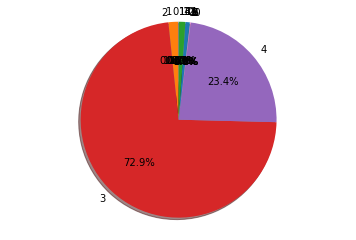

In [9]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

# The CREDIT_TYPE labels were pretty ridiculous.  Encoding them as Integers for ease of use.

bureau_data["CREDIT_TYPE_CODE"] = lb_make.fit_transform(bureau_data["CREDIT_TYPE"])
bureau_data[["CREDIT_TYPE", "CREDIT_TYPE_CODE"]].head(11)

explore_non_numeric(bureau_data['CREDIT_TYPE_CODE'])

non_numeric_features.append('CREDIT_TYPE_CODE')

#### CREDIT_ACTIVE
Status of the Credit Bureau (CB) reported credits

Value: 0 Count: 630607 Percentage: 36.739496209570106
Value: 1 Count: 21 Percentage: 0.0012234710689874554
Value: 2 Count: 1079273 Percentage: 62.87901385901419
Value: 3 Count: 6527 Percentage: 0.38026646034672007


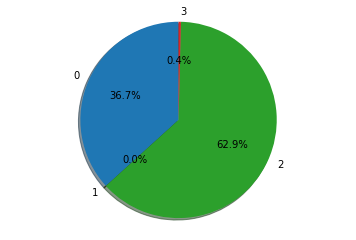

In [10]:
lb_make = LabelEncoder()

# The CREDIT_TYPE labels were pretty ridiculous.  Encoding them as Integers for ease of use.

bureau_data["CREDIT_ACTIVE_CODE"] = lb_make.fit_transform(bureau_data["CREDIT_ACTIVE"])
bureau_data[["CREDIT_ACTIVE", "CREDIT_ACTIVE_CODE"]].head(11)

explore_non_numeric(bureau_data['CREDIT_ACTIVE_CODE'])

non_numeric_features.append('CREDIT_ACTIVE_CODE')

#### CREDIT_CURRENCY
Recoded currency of the Credit Bureau credit

Value: 0 Count: 1715020 Percentage: 99.91796917785074
Value: 1 Count: 1224 Percentage: 0.07131088516384025
Value: 2 Count: 174 Percentage: 0.010137331714467486
Value: 3 Count: 10 Percentage: 0.0005826052709464073


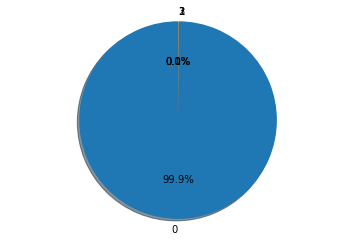

In [11]:
lb_make = LabelEncoder()

# The CREDIT_CURRENCY labels were pretty ridiculous.  Encoding them as Integers for ease of use.

bureau_data["CREDIT_CURRENCY_CODE"] = lb_make.fit_transform(bureau_data["CREDIT_CURRENCY"])
bureau_data[["CREDIT_CURRENCY", "CREDIT_CURRENCY_CODE"]].head(11)

explore_non_numeric(bureau_data['CREDIT_CURRENCY_CODE'])

non_numeric_features.append('CREDIT_CURRENCY_CODE')

### DAYS_CREDIT
How many days before current application did client apply for Credit Bureau credit

Max: 0 Min: -2922 Mean: -1142.107684680045 Avg: -1142.107684680045 Std: 795.1646965716541


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


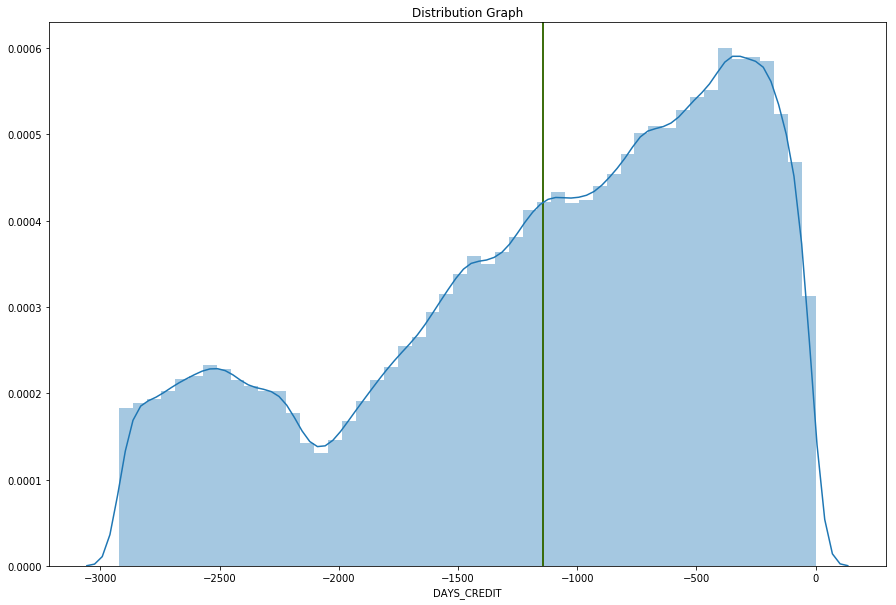

In [12]:
explore_numeric(bureau_data['DAYS_CREDIT']) 

##### CREDIT_DAY_OVERDUE
Number of days past due on CB credit at the time of application for related loan in our sample

Max: 2792 Min: 0 Mean: 0.8181665645165425 Avg: 0.8181665645165425 Std: 36.54441736067727


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


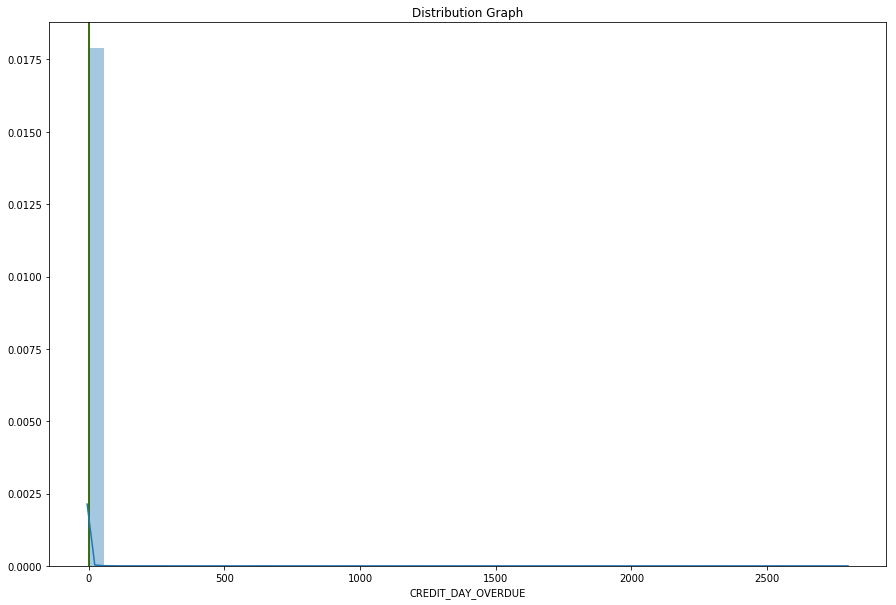

In [13]:
explore_numeric(bureau_data['CREDIT_DAY_OVERDUE'])

#### DAYS_CREDIT_ENDDATE
Remaining duration of CB credit (in days) at the time of application in Home Credit

Max: 31199.0 Min: -42060.0 Mean: 479.12272230469324 Avg: 479.12272230469324 Std: 4839.774610490461


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


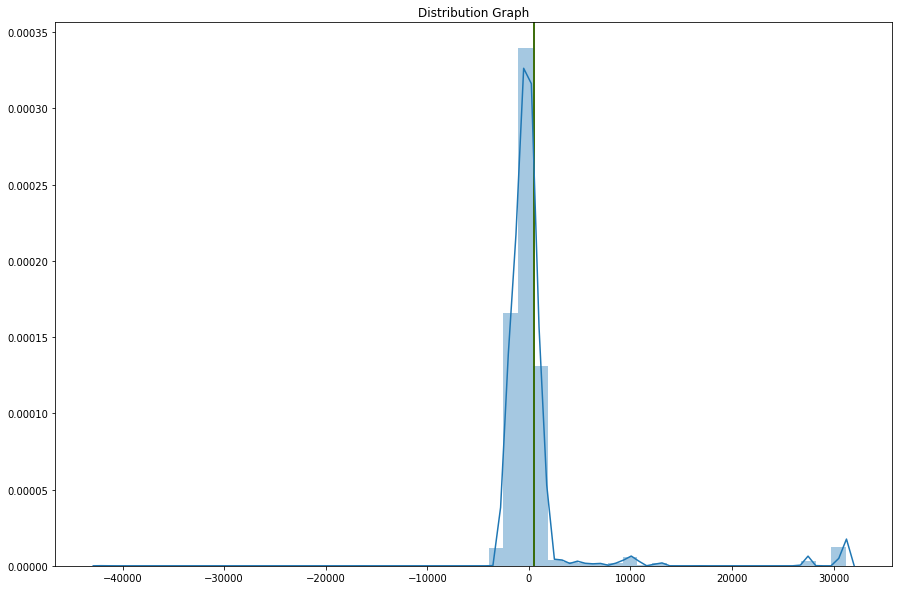

In [14]:
days_credit_enddate = np.nan_to_num(bureau_data['DAYS_CREDIT_ENDDATE'])
explore_numeric(days_credit_enddate)

#### DAYS_ENDDATE_FACT
Days since CB credit ended at the time of application in Home Credit (only for closed credit)

Max: 0.0 Min: -42023.0 Mean: -641.830305727942 Avg: -641.830305727942 Std: 750.1199610264179


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


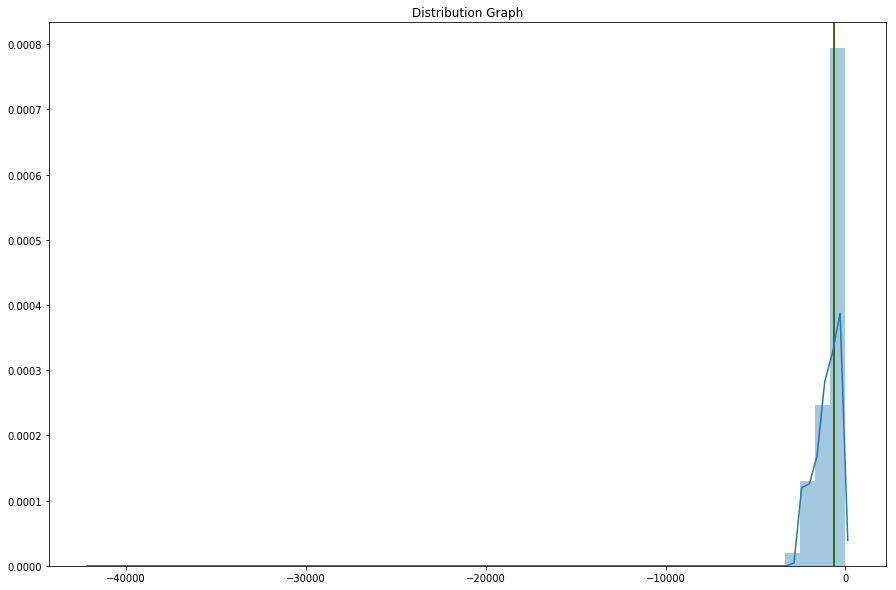

In [15]:
# Convert Non-Numerics
days_enddate = np.nan_to_num(bureau_data['DAYS_ENDDATE_FACT'], copy=True)
explore_numeric(days_enddate)

#### AMT_CREDIT_MAX_OVERDUE
Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

Max: 115987185.0 Min: 0.0 Mean: 1319.2617053636973 Avg: 1319.2617053636973 Std: 121006.46317626638


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


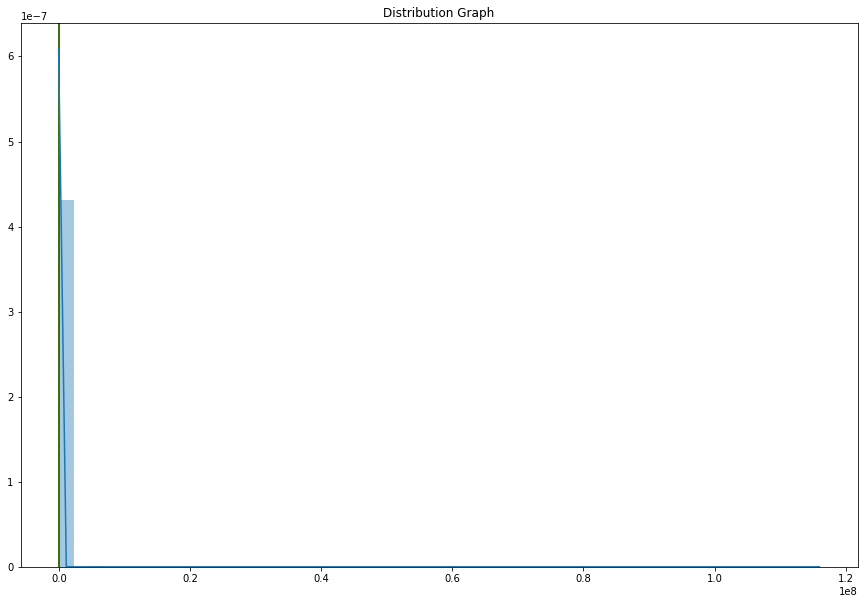

In [16]:
# Convert Non-Numerics
amt_credit_max_overdue = np.nan_to_num(bureau_data['AMT_CREDIT_MAX_OVERDUE'])
explore_numeric(amt_credit_max_overdue)

#### CNT_CREDIT_PROLONG
How many times was the Credit Bureau credit prolonged

Max: 9 Min: 0 Mean: 0.00641040579622332 Avg: 0.00641040579622332 Std: 0.09622387768971509


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


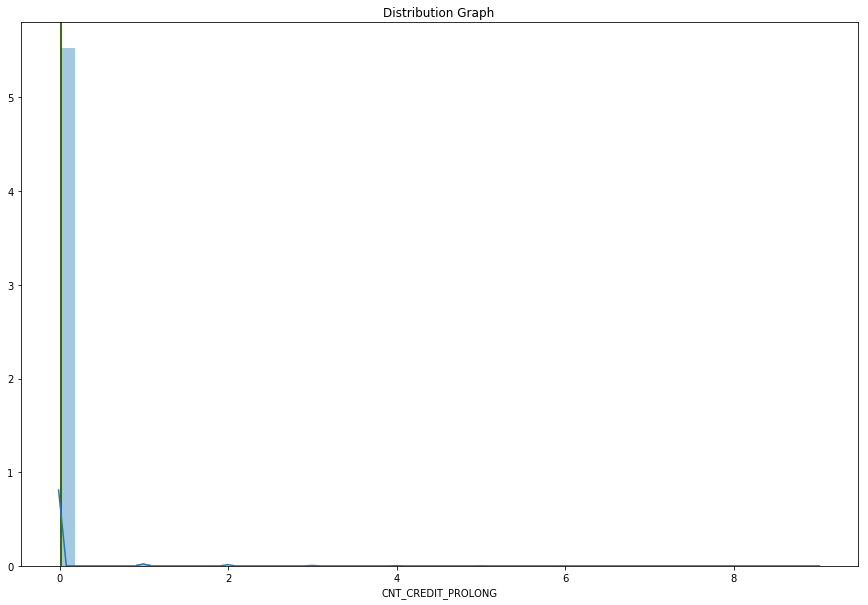

In [17]:
explore_numeric(bureau_data['CNT_CREDIT_PROLONG'])

#### AMT_CREDIT_SUM
Current credit amount for the Credit Bureau creditz

Max: 585000000.0 Min: 0.0 Mean: 354991.9032353073 Avg: 354991.9032353073 Std: 1149807.0698196827


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


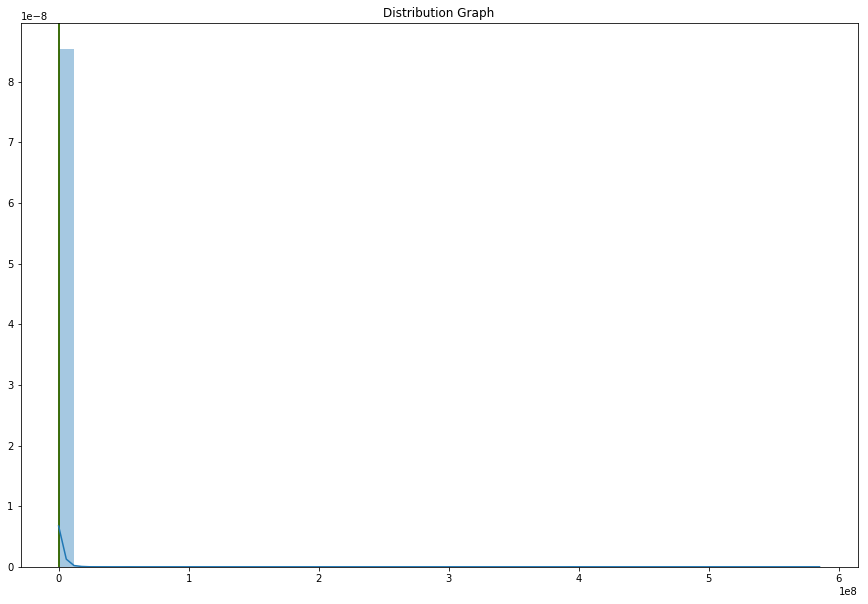

In [18]:
amt_credit_sum = bureau_data['AMT_CREDIT_SUM']
amt_credit_sum = np.nan_to_num(amt_credit_sum)

explore_numeric(amt_credit_sum)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 20.187122406905534 Min: 0.0 Mean: 11.408674277369942 Avg: 11.408674277369942 Std: 2.626797401787161


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


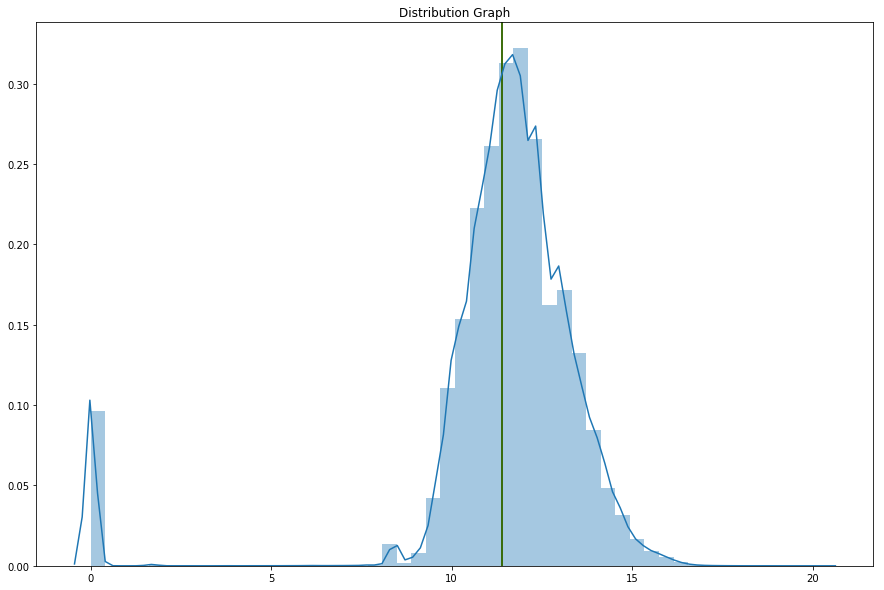

In [19]:
amt_credit_sum = bureau_data['AMT_CREDIT_SUM']
amt_credit_sum_transformed = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum_transformed_numeric = np.nan_to_num(amt_credit_sum_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_transformed_numeric)

#### AMT_CREDIT_SUM_DEBT
Current debt on Credit Bureau credit

Max: 170100000.0 Min: -4705600.32 Mean: 116505.9952973815 Avg: 116505.9952973815 Std: 626405.636085571


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


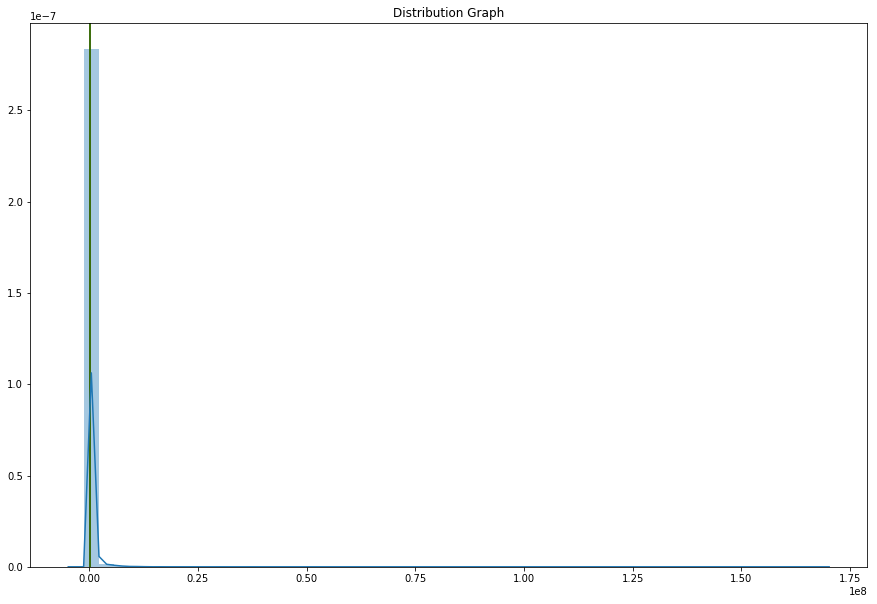

In [20]:
amt_credit_sum_debt = bureau_data['AMT_CREDIT_SUM_DEBT']
amt_credit_sum_debt = np.nan_to_num(amt_credit_sum_debt)

explore_numeric(amt_credit_sum_debt)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 18.951897063244985 Min: -4.605170185988091 Mean: 3.021237079439292 Avg: 3.021237079439292 Std: 5.256694412721233


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


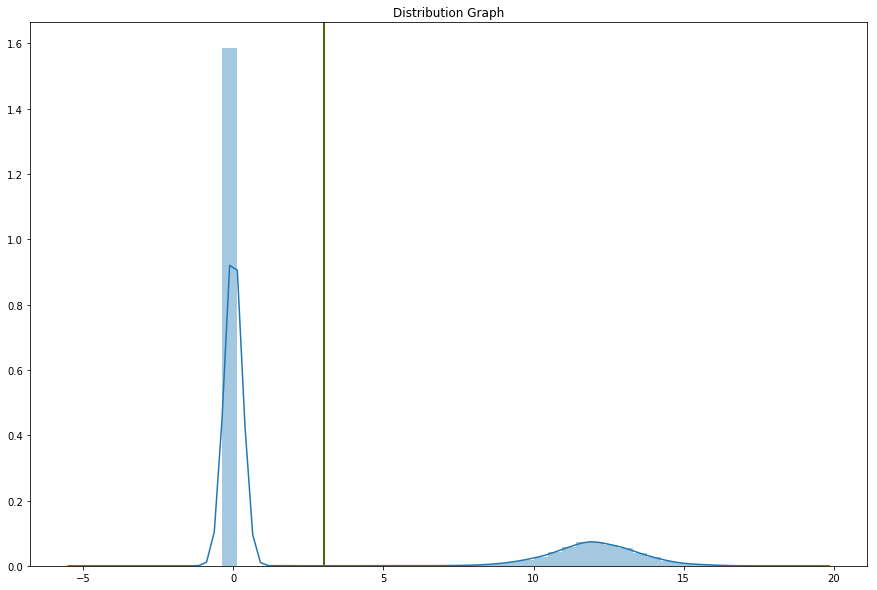

In [21]:
amt_credit_sum_debt = bureau_data['AMT_CREDIT_SUM_DEBT']
amt_credit_sum_debt_transformed = amt_credit_sum_debt.apply(lambda x: np.log(x + 1))
amt_credit_sum_debt_transformed_numeric = np.nan_to_num(amt_credit_sum_debt_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_debt_transformed_numeric)

#### AMT_CREDIT_SUM_LIMIT
Current credit limit of credit card reported in Credit Bureau

Max: 4705600.32 Min: -586406.115 Mean: 4081.739265244451 Avg: 4081.739265244451 Std: 36571.67496465721


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


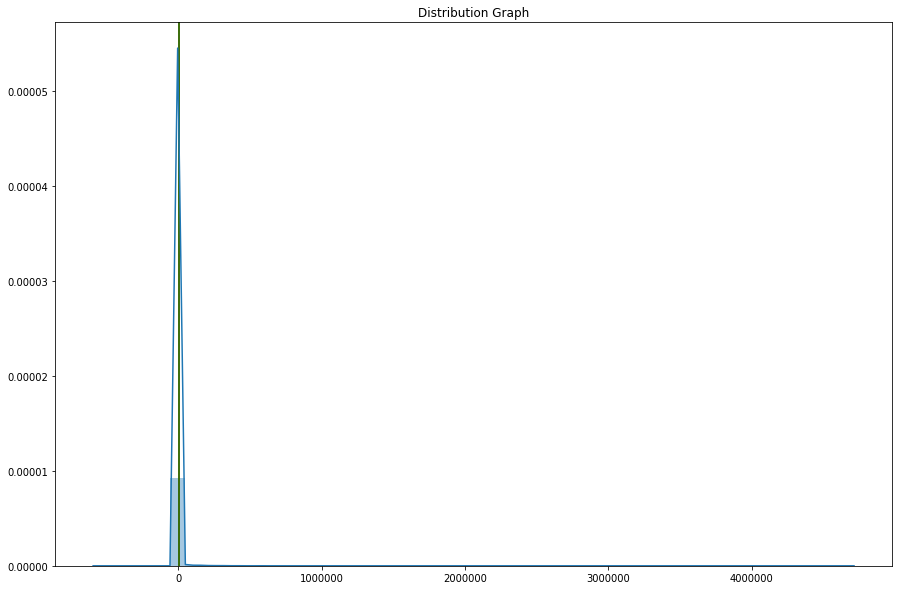

In [22]:
amt_credit_sum_limit = bureau_data['AMT_CREDIT_SUM_LIMIT']
amt_credit_sum_limit = np.nan_to_num(amt_credit_sum_limit)

explore_numeric(amt_credit_sum_limit)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.364264127298659 Min: -0.19845093872383818 Mean: 0.43162418297266103 Avg: 0.43162418297266103 Std: 2.09104664865829


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


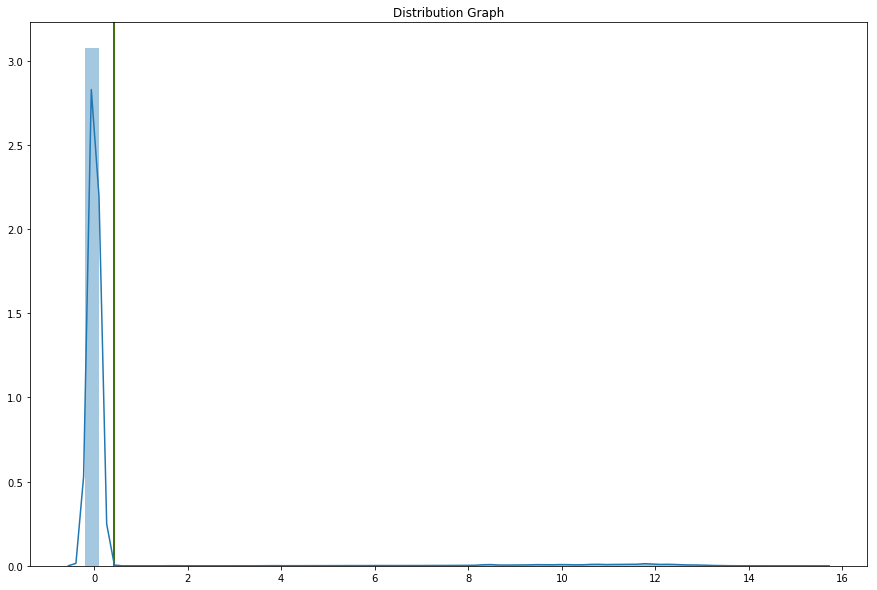

In [23]:
amt_credit_sum_limit = bureau_data['AMT_CREDIT_SUM_LIMIT']
amt_credit_sum_limit_transformed = amt_credit_sum_limit.apply(lambda x: np.log(x + 1))
amt_credit_sum_limit_transformed_numeric = np.nan_to_num(amt_credit_sum_limit_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_limit_transformed_numeric)

#### AMT_CREDIT_SUM_OVERDUE
Current amount overdue on Credit Bureau credit

Max: 3756681.0 Min: 0.0 Mean: 37.91275774165884 Avg: 37.91275774165884 Std: 5937.648305249403


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


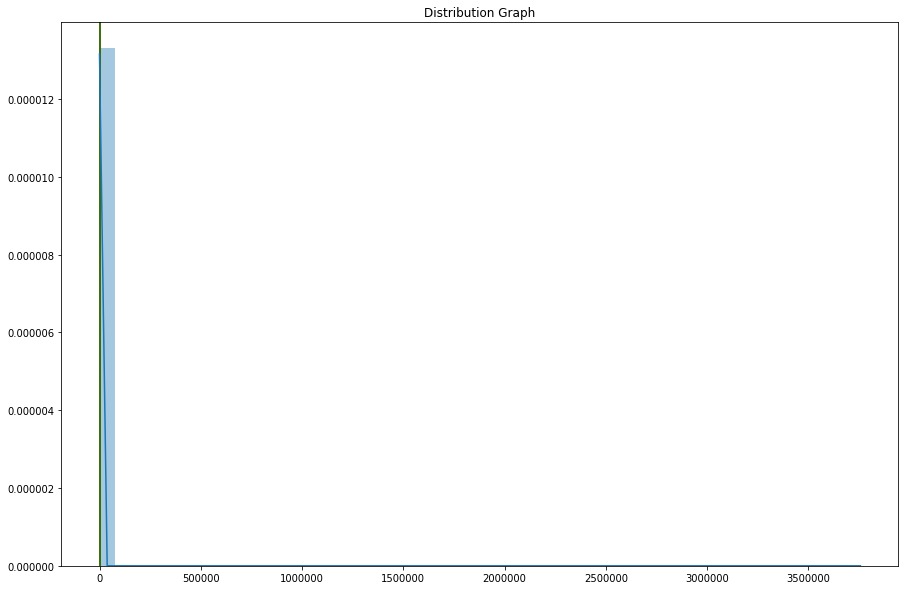

In [24]:
amt_credit_sum_overdue = bureau_data['AMT_CREDIT_SUM_OVERDUE']
amt_credit_sum_overdue = np.nan_to_num(amt_credit_sum_overdue)

explore_numeric(amt_credit_sum_overdue)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.139046678972173 Min: 0.0 Mean: 0.014190591395794587 Avg: 0.014190591395794587 Std: 0.31729931212689577


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


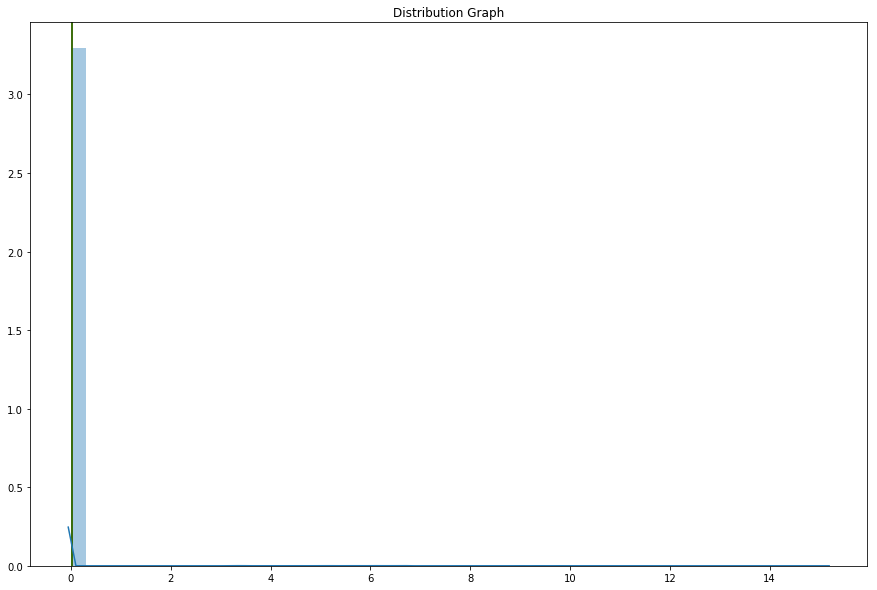

In [25]:
amt_credit_sum_overdue = bureau_data['AMT_CREDIT_SUM_OVERDUE']
amt_credit_sum_overdue_transformed = amt_credit_sum_overdue.apply(lambda x: np.log(x + 1))
amt_credit_sum_overdue_transformed_numeric = np.nan_to_num(amt_credit_sum_overdue_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_overdue_transformed_numeric)

#### DAYS_CREDIT_UPDATE
How many days before loan application did last information about the Credit Bureau credit come

Max: 372 Min: -41947 Mean: -593.7483197663986 Avg: -593.7483197663986 Std: 720.7471015455408


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


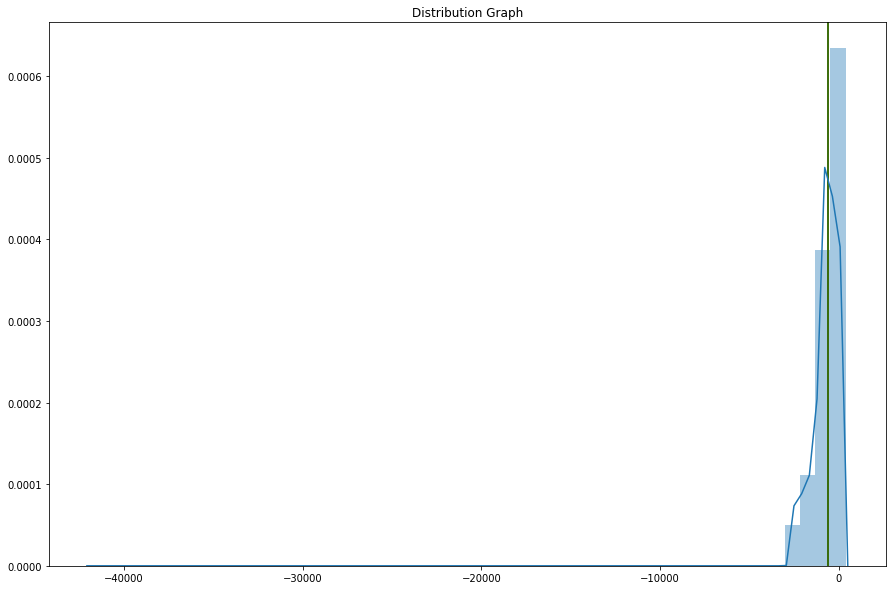

In [26]:
days_credit_update = np.nan_to_num(bureau_data['DAYS_CREDIT_UPDATE'])
explore_numeric(days_credit_update)

#### MONTHS_BALANCE
Month of balance relative to application date 

NOTE: There's a one-to-many relationship between bureau_balance_data and bureau_data, and this dataset is really large.  We'll need to do some feature engineering, like summing up the records per SK_BUREAU_ID or something just to make this managable.  This graph took ~15 minutes to draw... 

In [27]:
#Note: This takes an inordinate amount of time to draw.  It's a large dataset.  Uncomment it if you want.  Nothing special.
#explore_numeric(bureau_balance_data['MONTHS_BALANCE'])

#### STATUS
Status of Credit Bureau loan during the month (active, closed, DPD0-30,ÔøΩ [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,ÔøΩ 5 means DPD 120+ or sold or written off ]

In [ ]:
explore_non_numeric(bureau_balance_data['STATUS'])

### Feature Engineering

We have a situation where bureau_data has a one-to-many relationship with application_train, and bureau_balance_data has a one-to-many relationship with bureau_data; however, we need to present the data as a DataFrame to the classifier.

To accomplish this, we'll need to do a little feature engineering.

### One-Hot Encode Non Numeric Features

If we one-hot encode the non-numeric features, we can create aggregate counts for the application_data table.

In [ ]:
# One-Hot Encode all of our non-numeric features
bureau_data = pd.get_dummies(bureau_data, columns=non_numeric_features)

print("Bureau Data Columns: {0}".format(bureau_data.shape[1]))

In [ ]:
bureau_balance_data = pd.get_dummies(bureau_balance_data, columns=['STATUS'])

print("Bureau Balance Data Columns: {0}".format(bureau_balance_data.shape[1]))

In [ ]:
display(application_train.head())
display(bureau_data.head())
display(bureau_balance_data.head())

### New Features

We'll engineer some new features to combine with the application_train data.

In [ ]:
new_features = pd.DataFrame()
# Reset the index to get it to generate correctly, from:
# https://stackoverflow.com/questions/45747589/copying-a-column-from-one-dataframe-to-another-gives-nan-values
new_features.reset_index(drop=True)

display(application_train.head())

new_features = application_train['SK_ID_CURR']
display(new_features.head())


### NUM_BUREAU_REPORTS
Number of bureau reports for a given SK_ID_CURR

In [ ]:
num_reports = bureau_data.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
df_num_reports = num_reports.to_frame().reset_index()

# Had a hard time getting this column named correctly... from:
# https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_num_reports.rename(columns={'SK_ID_BUREAU': 'NUM_BUREAU_REPORTS'}, inplace=True)

new_features = new_features.merge(df_num_reports, on='SK_ID_CURR')
display(new_features.head())

#explore_numeric(np.nan_to_num(new_features["NUM_BUREAU_REPORTS"]))

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

In [ ]:
num_bureau_reports = new_features['NUM_BUREAU_REPORTS']
num_bureau_reports = num_bureau_reports.apply(lambda x: np.log(x + 1))
num_bureau_reports = np.nan_to_num(num_bureau_reports)

#visualize the new distribution
explore_numeric(num_bureau_reports)

log_transform_features.append('NUM_BUREAU_REPORTS')

### NUM_BUREAU_BALANCES
Number of balances recorded for a given SK_ID_CURR

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'NUM_BUREAU_BALANCES'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['NUM_BUREAU_BALANCES'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['NUM_BUREAU_BALANCES'] = bureau_data['NUM_BUREAU_BALANCES'].fillna(0)

display(bureau_data.head())

explore_numeric(np.nan_to_num(bureau_data['NUM_BUREAU_BALANCES']))

# Intentionally not included.  This is the first step in creating the SUM_BUREAU_BALANCES feature

### SUM_BUREAU_BALANCES
Now that we have some data in bureau_data, we'll need to summate it for inclusion in the application_train set

In [ ]:
sum_balances = bureau_data.groupby('SK_ID_CURR')['NUM_BUREAU_BALANCES'].sum()

df_sum_balances = sum_balances.to_frame().reset_index()
df_sum_balances.rename(columns={'NUM_BUREAU_BALANCES': 'SUM_BUREAU_BALANCES'}, inplace=True)

display(df_sum_balances.head())

new_features = new_features.merge(df_sum_balances, on='SK_ID_CURR')

display(new_features.head())

explore_numeric(np.nan_to_num(new_features['SUM_BUREAU_BALANCES']))

numeric_features.append('SUM_BUREAU_BALANCES')

### MONTHS_BALANCE


NOTE: We really need to group the MONTHS_BALANCE value by STATUS in order for it to be meaningful, since a closed account with a 60 month balance is pretty different than a default account with a 60 month balance, or a late, open account with a 2 month balance.

### SUM_CURRENCY_CODE

In [ ]:
display(bureau_data)

num_codes = 4
credit_active_codes = []

for i in range(0, num_codes): 
    credit_active_codes.append('CREDIT_CURRENCY_CODE_{0}'.format(i))

for code in credit_active_codes: 

    sum_code = bureau_data.groupby('SK_ID_CURR')[code].sum().rename(columns = {'SK_ID_CURR': code})

    new_code = 'SUM_{0}'.format(code)
    df_sum_code = pd.DataFrame(data=sum_code, columns=[new_code])

    bureau_data = bureau_data.merge(df_sum_code, on='SK_ID_CURR')
            
    bureau_data[new_code] = bureau_data[new_code].fillna(0)

    new_features[new_code] = bureau_data[new_code]

    numeric_features.append(new_code)     
    
display(new_features.head())

In [ ]:
display(new_features.head(n=100))

### SUM_CREDIT_ACTIVE_CODE

In [ ]:
num_codes = 4
credit_active_codes = []

for i in range(0, num_codes): 
    credit_active_codes.append('CREDIT_ACTIVE_CODE_{0}'.format(i))

for code in credit_active_codes: 

    sum_code = bureau_data.groupby('SK_ID_CURR')[code].sum().rename(columns = {'SK_ID_CURR': code})

    new_code = 'SUM_{0}'.format(code)
    df_sum_code = pd.DataFrame(data=sum_code, columns=[new_code])

    bureau_data = bureau_data.merge(df_sum_code, on='SK_ID_CURR')
            
    bureau_data[new_code] = bureau_data[new_code].fillna(0)

    new_features[new_code] = bureau_data[new_code]

    numeric_features.append(new_code)     
    
display(new_features.head())

### SUM_CREDIT_TYPE_CODE
Number of balances with a status of 0 recorded for a given SK_ID_BUREAU

In [ ]:
num_codes = 15
credit_type_codes = []

for i in range(0, num_codes): 
    credit_type_codes.append('CREDIT_TYPE_CODE_{0}'.format(i))

for code in credit_type_codes: 

    sum_code = bureau_data.groupby('SK_ID_CURR')[code].sum().rename(columns = {'SK_ID_CURR': code})

    new_code = 'SUM_{0}'.format(code)
    df_sum_code = pd.DataFrame(data=sum_code, columns=[new_code])

    bureau_data = bureau_data.merge(df_sum_code, on='SK_ID_CURR')
            
    bureau_data[new_code] = bureau_data[new_code].fillna(0)

    new_features[new_code] = bureau_data[new_code]
    
    numeric_features.append(new_code)                

In [ ]:
display(new_features.head())

### SUM_STATUS_0
Number of balances with a status of 0 recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_0'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_0'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_0'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_0'] = bureau_data['SUM_STATUS_0'].fillna(0)

new_features['SUM_STATUS_0'] = bureau_data['SUM_STATUS_0']

numeric_features.append("SUM_STATUS_0")

explore_numeric(new_features['SUM_STATUS_0'])

### SUM_STATUS_1
Number of balances with a status of 0 recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_1'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_1'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_1'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_1'] = bureau_data['SUM_STATUS_1'].fillna(0)

new_features['SUM_STATUS_1'] = bureau_data['SUM_STATUS_1']

explore_numeric(new_features['SUM_STATUS_1'])

numeric_features.append("SUM_STATUS_1")


### SUM_STATUS_2
Number of balances with a status of 2 recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_2'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_2'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_2'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_2'] = bureau_data['SUM_STATUS_2'].fillna(0)

new_features['SUM_STATUS_2'] = bureau_data['SUM_STATUS_2']

numeric_features.append("SUM_STATUS_2")

### SUM_STATUS_3
Number of balances with a status of 3 recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_3'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_3'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_3'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_3'] = bureau_data['SUM_STATUS_3'].fillna(0)

new_features['SUM_STATUS_3'] = bureau_data['SUM_STATUS_3']

numeric_features.append("SUM_STATUS_3")

### SUM_STATUS_4
Number of balances with a status of 4 recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_4'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_4'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_4'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_4'] = bureau_data['SUM_STATUS_4'].fillna(0)

new_features['SUM_STATUS_4'] = bureau_data['SUM_STATUS_4']

numeric_features.append("SUM_STATUS_5")

### SUM_STATUS_5
Number of balances with a status of 5 recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_5'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_5'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_5'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_5'] = bureau_data['SUM_STATUS_5'].fillna(0)

new_features['SUM_STATUS_5'] = bureau_data['SUM_STATUS_5']

numeric_features.append("SUM_STATUS_5")

### SUM_STATUS_C
Number of balances with a status of C recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_C'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_C'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_C'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_C'] = bureau_data['SUM_STATUS_C'].fillna(0)

new_features['SUM_STATUS_C'] = bureau_data['SUM_STATUS_C']

numeric_features.append("SUM_STATUS_C")

### SUM_STATUS_X
Number of balances with a status of X recorded for a given SK_ID_BUREAU

In [ ]:
num_balances = bureau_balance_data.groupby('SK_ID_BUREAU')['STATUS_X'].sum().rename(columns = {'SK_ID_BUREAU': 'SUM_STATUS_X'})
#display(num_balances.head())

df_num_balances = pd.DataFrame(data=num_balances, columns=['SUM_STATUS_X'])
#display(df_num_balances.head())

bureau_data = bureau_data.merge(df_num_balances, on='SK_ID_BUREAU')
bureau_data['SUM_STATUS_X'] = bureau_data['SUM_STATUS_X'].fillna(0)

new_features['SUM_STATUS_X'] = bureau_data['SUM_STATUS_X']

numeric_features.append("SUM_STATUS_X")

### MED_DAYS_CREDIT

The median number of days before current application that client apply for Credit Bureau credit, across all available credit bureau reports.

In [ ]:
days_credit = bureau_data.groupby('SK_ID_CURR')['DAYS_CREDIT'].median()
df_days_credit = days_credit.to_frame()

new_features = new_features.merge(df_days_credit, on='SK_ID_CURR')

display(new_features.head())

display(type(numeric_features))
display(numeric_features)

### SUM_CREDIT_DAYS_OVERDUE

Total days of overdue credit across all bureau reports.

In [ ]:
credit_day_overdue = bureau_data.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].sum()

new_features["SUM_CREDIT_DAY_OVERDUE"] = credit_day_overdue
display(new_features.head())

numeric_features.append("SUM_CREDIT_DAYS_OVERDUE")

### SUM_CREDIT_DAYS_ENDDATE
Remaining duration of CB credit (in days) at the time of application in Home Credit

In [ ]:
credit_days_enddate = bureau_data.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].sum()

new_features["SUM_DAYS_CREDIT_ENDDATE"] = credit_days_enddate
display(new_features.head())

numeric_features.append('SUM_DAYS_CREDIT_ENDDATE')

### SUM_DAYS_ENDDATE_FACT
Days since CB credit ended at the time of application in Home Credit (only for closed credit)

In [ ]:
days_enddate_fact = bureau_data.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].sum()

new_features["SUM_DAYS_ENDDATE_FACT"] = days_enddate_fact
display(new_features.head())

numeric_features.append('SUM_DAYS_ENDDATE_FACT')

### SUM_AMT_CREDIT_MAX_OVERDUE
Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

In [ ]:
credit_max_overdue = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum()

explore_numeric(np.nan_to_num(credit_max_overdue))

new_features["SUM_AMT_CREDIT_MAX_OVERDUE"] = credit_max_overdue
display(new_features.head())

numeric_features.append('SUM_AMT_CREDIT_MAX_OVERDUE')

### SUM_CNT_CREDIT_PROLONG
How many times was the Credit Bureau credit prolonged

In [ ]:
cnt_credit_prolong = bureau_data.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum()

new_features["SUM_CNT_CREDIT_PROLONG"] = cnt_credit_prolong
display(new_features.head())

numeric_features.append('SUM_CND_CREDIT_PROLONG')

### SUM_AMT_CREDIT_SUM
Current credit amount for the Credit Bureau credit

In [ ]:
'''
NOTE: Something is wrong with this data.  It's not obvious what's happening... 

amt_credit_sum = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()

new_features["SUM_AMT_CREDIT_SUM"] = amt_credit_sum
display(new_features.head())
'''

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

In [ ]:
'''
amt_credit_sum = new_features['SUM_AMT_CREDIT_SUM']
amt_credit_sum_transformed = amt_credit_sum.apply(lambda x: np.log(x + 1))
amt_credit_sum_transformed_numeric = np.nan_to_num(amt_credit_sum_transformed, copy=True)

#visualize the new distribution
explore_numeric(amt_credit_sum_transformed_numeric)

log_transform_features.append('SUM_AMT_CREDIT_SUM')
'''

### SUM_AMT_CREDIT_SUM_DEBT
Current debt on Credit Bureau credit

In [ ]:
amt_credit_sum_debt = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()

new_features["SUM_AMT_CREDIT_SUM_DEBT"] = amt_credit_sum_debt
display(new_features.head())

### SUM_AMT_CREDIT_SUM_LIMIT
Current credit limit of credit card reported in Credit Bureau

In [ ]:
amt_credit_sum_limit = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].sum()

new_features["SUM_AMT_CREDIT_SUM_LIMIT"] = amt_credit_sum_limit
display(new_features.head())

### SUM_DAYS_CREDIT_UPDATE
How many days before loan application did last information about the Credit Bureau credit

In [ ]:
days_credit_update = bureau_data.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].sum()
new_features["SUM_DAYS_CREDIT_UPDATE"] = days_credit_update
display(new_features.head())

#### Merge New Features to Bureau Data

In [ ]:
display(new_features.head()) 

application_train_merged = application_train.merge(new_features, on='SK_ID_CURR')

display(application_train_merged.head())

### Export

In [ ]:
application_train.to_csv('data/tmp/application_train_bureau_data_merged.csv')

non_numeric_features = pd.DataFrame({'features':non_numeric_features})
numeric_features = pd.DataFrame({'features':numeric_features})
string_to_bool_features = pd.DataFrame({'features':string_to_bool_features})
log_transform_features = pd.DataFrame({'features':log_transform_features})

non_numeric_features.to_csv('data/tmp/bureau_non_numeric_features.csv')
numeric_features.to_csv('data/tmp/bureau_numeric_features.csv')
string_to_bool_features.to_csv('data/tmp/bureau_string_to_bool.csv')
log_transform_features.to_csv('data/tmp/bureau_log_transform.csv')

In [ ]:
display(np.max(application_train_merged['SUM_AMT_CREDIT_MAX_OVERDUE']))